### Gathering data

In [1]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
#read csv file
df=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Getting additional information from Twitter based on tweet_id from our enhanced twitter archive dataset. Twitter's keys not provided.

consumer_key = '****'
consumer_secret = '****'
access_token = '****'
access_secret = '****'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
list_id=[]
for x in range(df.tweet_id.count()):
    list_id.append(df.tweet_id[x])

data_tweet=[]
tweet_id_error=[]

with open('tweet_json.txt','w') as f:
        for x in list_id:
            try:
                tweet= api.get_status(x, tweet_mode='extended')
                data_tweet.append(tweet._json)
                       
            except tweepy.TweepError as e:
                tweet_id_error.append(tweet._json)
                print ('code error:',e.args[0][0]['code'])
                print('no more valid tweet_ID for:{}'.format(x))
        json.dump(data_tweet,f, indent=4) 

NameError: name 'tweet' is not defined

In [3]:
# read json file
with open('tweet_json.txt') as f:
    data_tweet=json.load(f)
print (len(data_tweet))

2341


In [1]:
#write a json file for each tweet_id which was  not found. Not working as we did not call Twitter API
with open('tweet_error_json.txt','w') as f_error:
    json.dump(tweet_id_error,f_error, indent=4)

NameError: name 'json' is not defined

In [4]:
#read the json file for the tweet error
with open('tweet_error_json.txt') as g:
    data_error_tweet=json.load(g)
    print(len(data_error_tweet))

15


In [5]:
tweetid=[]
rtweet=[]
favcount=[]

# Create a dataframe for the additional information gathered via Twitter API
for p in range(len(data_tweet)):
    id_n=data_tweet[p]['id']
    rt=data_tweet[p]['retweet_count']
    fav= data_tweet[p]['favorite_count']
    tweetid.append(id_n)
    rtweet.append(rt)
    favcount.append(fav)

tweet_addinfo= pd.DataFrame({"Tweet_ID": tweetid, "Retweet_count": rtweet, "Favorite_count": favcount})

In [6]:
#get data from URL
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)
with open ('image_predictions.tsv', 'wb') as f:
    f.write(r.content)

In [7]:
#read csv file
dfi= pd.read_csv('image_predictions.tsv', sep='\t')

## Assessing datasets

In this section, I will assess the datasets according to the following: completeness, accuracy, validity and consistency.

In [8]:
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [9]:
tweet_addinfo.head()

Tweet_ID  Retweet_count  Favorite_count
0  892420643555336193           8444           38421
1  892177421306343426           6221           32916
2  891815181378084864           4123           24803
3  891689557279858688           8574           41774
4  891327558926688256           9301           39931

In [10]:
dfi.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
tweet_addinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
Tweet_ID          2341 non-null int64
Retweet_count     2341 non-null int64
Favorite_count    2341 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [13]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#check if names are correctly gathered
df['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
an            7
Bailey        7
Daisy         7
Toby          7
Buddy         7
Jax           6
Dave          6
Oscar         6
Bella         6
Leo           6
Scout         6
Stanley       6
Koda          6
Jack          6
Milo          6
Rusty         6
Alfie         5
           ... 
Aldrick       1
Jim           1
Farfle        1
Kawhi         1
Diogi         1
Mabel         1
Frönq         1
Pippin        1
Bobby         1
Yoda          1
Sky           1
Sobe          1
Saydee        1
Durg          1
Pepper        1
Biden         1
Monster       1
Torque        1
Ito           1
Amy           1
Horace        1
Margo         1
Clyde         1
Leonidas      1
Joey          1
Travis        1
light         1
Boston        1
Blipson       1
Mason         1
Name: name, Length: 957,

In [15]:
df['name'].sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [16]:
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [17]:
#check if all denominator is at 10
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
#count any duplicated tweet_id
tweet_addinfo['Tweet_ID'].duplicated().value_counts()

False    2341
Name: Tweet_ID, dtype: int64

In [19]:
#count any duplicated jpg image references
dfi.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [20]:
#list the different tweets'sources
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
df.loc[(df[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
191   855851453814013952                    NaN                  NaN   
200   854010172552949760                    NaN                  NaN   
460   817777686764523521                    NaN                  NaN   
531   808106460588765185                    NaN                  NaN   
565   802265048156610565           7.331095e+17         4.196984e+09   
575   801115127852503040                    NaN                  NaN   
705   785639753186217984                    NaN                  NaN   
733   781308096455073793                    NaN                  NaN   
778   775898661951791106                    NaN                  NaN   
822   770093767776997377                    NaN                  NaN   
889   759793422261743616                    NaN                  NaN   
956   751583847268179968                    NaN                  NaN   
1063  741067306818797568                    NaN                  NaN   
1113  733109485275860992                    NaN                  NaN   

                      timestamp  \
191   2017-04-22 18:31:02 +0000   
200   2017-04-17 16:34:26 +0000   
460   2017-01-07 16:59:28 +0000   
531   2016-12-12 00:29:28 +0000   
565   2016-11-25 21:37:47 +0000   
575   2016-11-22 17:28:25 +0000   
705   2016-10-11 00:34:48 +0000   
733   2016-09-29 01:42:20 +0000   
778   2016-09-14 03:27:11 +0000   
822   2016-08-29 03:00:36 +0000   
889   2016-07-31 16:50:42 +0000   
956   2016-07-09 01:08:47 +0000   
1063  2016-06-10 00:39:48 +0000   
1113  2016-05-19 01:38:16 +0000   

                                                 source  \
191   <a href="http://twitter.com/download/iphone" r...   
200   <a href="http://twitter.com/download/iphone" r...   
460   <a href="http://twitter.com/download/iphone" r...   
531   <a href="http://twitter.com/download/iphone" r...   
565   <a href="http://twitter.com/download/iphone" r...   
575   <a href="http://twitter.com/download/iphone" r...   
705   <a href="http://twitter.com/download/iphone" r...   
733   <a href="http://vine.co" rel="nofollow">Vine -...   
778   <a href="http://twitter.com/download/iphone" r...   
822   <a href="http://twitter.com/download/iphone" r...   
889   <a href="http://twitter.com/download/iphone" r...   
956   <a href="http://twitter.com/download/iphone" r...   
1063  <a href="http://twitter.com/download/iphone" r...   
1113  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
191   Here's a puppo participating in the #ScienceMa...                  NaN   
200   At first I thought this was a shy doggo, but i...                  NaN   
460   This is Dido. She's playing the lead role in "...                  NaN   
531   Here we have Burke (pupper) and Dexter (doggo)...                  NaN   
565   Like doggo, like pupper version 2. Both 11/10 ...                  NaN   
575   This is Bones. He's being haunted by another d...                  NaN   
705   This is Pinot. He's a sophisticated doggo. You...                  NaN   
733   Pupper butt 1, Doggo 0. Both 12/10 https://t.c...                  NaN   
778   RT @dog_rates: Like father (doggo), like son (...         7.331095e+17   
822   RT @dog_rates: This is just downright precious...         7.410673e+17   
889   Meet Maggie &amp; Lila. Maggie is the doggo, L...                  NaN   
956   Please stop sending it pictures that don't eve...                  NaN   
1063  This is just downright precious af. 12/10 for ...                  NaN   
1113  Like father (doggo), like son (pupper). Both 1...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
191                        NaN                        NaN   
200                        NaN                        NaN   
460                        NaN                        NaN   
531                        NaN                        NaN   
565              

### I have spotted visually or programmatically the following issues:

#### Quality issues

- In df:
        1. We want rating with image and it is not the case all the time
        2. No retweets is a key point which is not the case some times.
        3. Numerator rating is not properly gathering float numbers (e.g. 13.5)
        4. Timestamp, tweet_id has not the right data type
        5. Denominator rating is above 10 due to group tweet
        6. Erroneous name of dogs like very, a , an 
        
- In tweet_addinfo:
        7. Name 'tweet_id' is not consistent between tweet_addinfo and df i.e not the same format

- In dfi:
        8. Some tweet_id have jpg_url duplicated

#### Tidiness issues

- In df:
    1. all the type of dogs are in separate columns. It can be in one as well as the multiple dog_stage entries. We          will set the type to categorical
    2. tweet_addinfo and dfi datasets should be part of df
    3. the columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful          anymore as we are looking for non retweets

## Cleaning datasets

In [22]:
#lets make a copy of our datasets first
df_clean=df.copy()
dfa_clean= tweet_addinfo.copy()
dfi_clean=dfi.copy()

In [23]:
#In order to see the full text in column
pd.set_option('display.max_colwidth', -1)

#### Issue:

name 'tweet_id' are not consistent between tweet_addinfo and df


#### Define:

rename tweet_id colum in tweet_addinfo in lower case

#### Code:

In [24]:
#put columns' names in lowercase
dfa_clean.columns = dfa_clean.columns.str.lower()

#### Test:

In [25]:
dfa_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
tweet_id          2341 non-null int64
retweet_count     2341 non-null int64
favorite_count    2341 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


#### Issue

tweet_addinfo dataset and dfi should be part of df

#### Define

I will merge the three datasets df, dfi and tweet_addinfo with the key='tweet_id'

#### Code

In [26]:
#merging accordingly the datasets
df_clean= pd.merge(df_clean, dfa_clean, how='right', on=['tweet_id'])
df_clean= pd.merge(df_clean, dfi_clean, how='right', on=['tweet_id'])

#### Test

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 30 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null float64
rating_denominator            2067 non-null float64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
retweet_count                 2

#### Issue
we do not want retweet which is the case some times.

#### Define
I will drop the retweeted with the column retweeted_status_id by keeping those who have no retweet status

#### Code

In [28]:
#keep the null rows
df_clean=df_clean[pd.isnull(df_clean.retweeted_status_id)]

#### Test

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 0 to 2074
Data columns (total 30 columns):
tweet_id                      2001 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1993 non-null object
source                        1993 non-null object
text                          1993 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1993 non-null object
rating_numerator              1993 non-null float64
rating_denominator            1993 non-null float64
name                          1993 non-null object
doggo                         1993 non-null object
floofer                       1993 non-null object
pupper                        1993 non-null object
puppo                         1993 non-null object
retweet_count                 1993

#### Issue
we want rating with image and it is not the case all the time

#### Define
We will use the expanded_urls column (even if it is containing videos and pictures) as the key to make the cleaning i.e. all NaN value will be then deleted.

#### Code

In [30]:
#drop all NaN rows
df_clean = df_clean.dropna(subset=['expanded_urls'])

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      1993 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1993 non-null object
source                        1993 non-null object
text                          1993 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1993 non-null object
rating_numerator              1993 non-null float64
rating_denominator            1993 non-null float64
name                          1993 non-null object
doggo                         1993 non-null object
floofer                       1993 non-null object
pupper                        1993 non-null object
puppo                         1993 non-null object
retweet_count                 1993

#### Issue
the columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful anymore as we are looking for non retweets.

#### Define
I will drop the useless columns

#### Code

In [32]:
#drop the mentioned columns
df_clean=df_clean.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
name                     1993 non-null object
doggo                    1993 non-null object
floofer                  1993 non-null object
pupper                   1993 non-null object
puppo                    1993 non-null object
retweet_count            1993 non-null float64
favorite_count           1993 non-null float64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf            

#### Issue
All the type of dogs are in separate columns. It can be in one column. 

#### Define
I will create a column multiple dog_stage. Then I will melt the 4 columns (doogo, floofer,pupper and puppo, multiple dog_stage) in one for dog stage. The type will be change also to category

#### Code

In [34]:
#First replace None value with ''
df_clean.doggo=df_clean.doggo.replace('None','')
df_clean.floofer=df_clean.floofer.replace('None','')
df_clean.pupper=df_clean.pupper.replace('None','')
df_clean.puppo=df_clean.puppo.replace('None','')

#merge the dogs breeds in one column
df_clean=pd.melt(df_clean, id_vars=['tweet_id' , 'in_reply_to_status_id', 'in_reply_to_user_id',
                                    'timestamp','source','text','expanded_urls','retweet_count','favorite_count','rating_numerator','rating_denominator','name','jpg_url',
                                    'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 
                                    value_vars=['doggo','floofer','pupper','puppo'], var_name='Doggy',value_name = 'dog_stage')

#drop the column Doggy
df_clean=df_clean.drop(['Doggy'], axis=1)

#replace '' with NaN 
df_clean.dog_stage=df_clean.dog_stage.replace('',np.nan)

#drop duplicated tweet_id by sorting dog_stage value first
df_clean = df_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'first')

In [35]:
#warning off
import warnings
warnings.simplefilter("ignore")

#get a dataframe with the multiple entry of dog_stage
dd=df.loc[(df[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

#join multiple entry and reshape the format without comma
dd['multiple_stage'] = dd[dd.columns[13:16]].apply(lambda x: ','.join(x),axis=1)
dd['multiple_stage']=dd['multiple_stage'].str.replace('None,?' , '').str.replace(',$' , '')

#Dataframe of only the needed columns (tweet_id and multiple_stage)
dr=dd[['tweet_id', 'multiple_stage']]

#Modify main df_clean with the multiple values
for index, row in dr.iterrows():
    df_clean.loc[df_clean['tweet_id']== row['tweet_id'], 'dog_stage']= row['multiple_stage']

In [36]:
#set the type as category
df_clean.dog_stage=df_clean.dog_stage.astype('category')

#### Test

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 9 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
retweet_count            1993 non-null float64
favorite_count           1993 non-null float64
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
name                     1993 non-null object
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993 non-null float64
p2_dog             

In [38]:
df_clean.dog_stage.value_counts(dropna=False)

NaN              1687
pupper           203 
doggo            64  
puppo            22  
doggo,pupper     9   
floofer          7   
doggo,floofer    1   
Name: dog_stage, dtype: int64

In [39]:
df_clean.dog_stage.value_counts(dropna=False).sum()

1993

#### Issue
The column name has missing or wrong names

#### Define
I will change all names to 'None' for those who will not match the following frame: this is, Meet ( or meet) , here we have and here is + (name) 

#### Code

In [40]:
import re
dog_names = {}
#read row by row and check the relevant start of tweet's text
for index, row in df_clean.iterrows():

        if row.text.startswith('This is '):
            dog_names[index]= (re.findall(r"[A-Z].+", row.text.split()[2]))
         
        elif row.text.startswith('Here we have '):
            dog_names[index]= (re.findall(r"[A-Z].+", row.text.split()[3]))
            
        elif row.text.startswith('Meet '):
            dog_names[index]= (re.findall(r"[A-Z].+", row.text.split()[1]))
            
        elif row.text.startswith('Here is '):
            dog_names[index]= (re.findall(r"[A-Z].+", row.text.split()[2]))

#transform to a dataframe for merging purpose. In same time, strip for clean names          
new_nameslist= pd.DataFrame.from_dict(dog_names,orient='index', columns=['dog_names'])
new_nameslist.dog_names=new_nameslist.dog_names.str.strip('.')

df_clean=pd.merge(df_clean, new_nameslist, right_index=True, left_index=True)

df_clean=df_clean.drop(['name'], axis=1)


#### Test

In [41]:
df_clean.dog_names.value_counts(dropna=False)

NaN         93
Tucker      9 
Lucy        9 
Charlie     9 
Cooper      9 
Oliver      8 
Penny       8 
Winston     7 
Lola        7 
Daisy       7 
Stanley     6 
Toby        6 
Bella       6 
Jax         6 
Sadie       6 
Koda        6 
Bo          6 
Chester     5 
Louis       5 
Oscar       5 
Scout       5 
Buddy       5 
Rusty       5 
Dave        5 
Milo        5 
Bailey      5 
Sophie      4 
Scooter     4 
Larry       4 
Duke        4 
           .. 
Mabel       1 
Doobert     1 
Birf        1 
Mingus      1 
Cilantro    1 
Tuck        1 
Bobby       1 
Torque      1 
Monster     1 
Biden       1 
Bones       1 
Dobby       1 
Butters     1 
Zeus        1 
Shooter     1 
Carter      1 
Jameson     1 
Baron       1 
Millie      1 
Chipson     1 
Yoda        1 
Sky         1 
Sobe        1 
Andru       1 
Lulu        1 
Milky       1 
Saydee      1 
Durg        1 
Pepper      1 
Mattie      1 
Name: dog_names, Length: 868, dtype: int64

#### Isssue
some ratings are wrong with decimal number for example: it's 13.5/10 but recorded 5/10 

#### Define
I will extract all related rows. I will get the correct rating from the text column and modify the main dataframe accordingly based on tweet_id.

#### Code

In [42]:
#warning off
import warnings
warnings.simplefilter("ignore")

#get all rows with rating as a decimal
dff=df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]
dfff=dff[['tweet_id','text']]

#transform to a panda series to extract the float number
s=pd.Series(dfff.text)
f=s.str.findall(r"(\d+\.\d*)")
e = f.str[0]

#transform again our panda series into DataFrame, then drop unnecessary columns and rename accordingly i.e. rating numerator
dff1= dfff.merge(e.to_frame(), left_index=True, right_index=True)
dff1=dff1.drop('text_x', axis=1)
dff1=dff1.rename(index=str, columns={"text_y": "rating_numerator"})

# loop to modify to the main Dataframe df_clean the rating with a decimal
for index, row in dff1.iterrows():
    df_clean.loc[df_clean['tweet_id']==row['tweet_id'], 'rating_numerator']=row['rating_numerator']

#### Test

In [43]:
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator']]

text  \
4539  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
39    This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                            
503   This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                    
1373  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                                          

     rating_numerator  
4539  11.27            
39    13.5             
503   9.75             
1373  11.26

#### Issue
The rating denominator is sometimes above 10 for different reasons like group ratings or simply because there are 2 numbers which is considered as a rating which is not.

#### Define
I will gather manually the tweet_id due the few numbers of wrong data and correct them programmatically. I will drop the group rating as it is not clear each time how it is defined

#### Code

In [44]:
df_clean[df_clean.rating_denominator!=10][['tweet_id','text','rating_numerator','rating_denominator']]

tweet_id  \
385   810984652412424192   
924   716439118184652801   
1053  704054845121142784   
1327  682962037429899265   
1493  675853064436391936   
1972  666287406224695296   

                                                                                                                                                                           text  \
385   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
924   This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                                                       
1053  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa                                                                                          
1327  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5                                 
1493  Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw                                                                 
1972  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv                                    

     rating_numerator  rating_denominator  
385   24               7.0                 
924   50               50.0                
1053  60               50.0                
1327  7                11.0                
1493  88               80.0                
1972  1                2.0

In [45]:
#Gathering manually the tweet_id to modify the erroneous denominator
list_for_cleaning=[666287406224695296,682962037429899265,716439118184652801,722974582966214656,740373189193256964]
new_denominator=[9,10,11,13,14]

In [46]:
#modifying the column denominator and numerator rating with the correct values
for x in list_for_cleaning:
    for y in new_denominator:
        df_clean.loc[df_clean['tweet_id']== x, ['rating_numerator','rating_denominator']]= y,10

In [47]:
#list the index of tweets to delete
not_considered_tweet= df_clean[df_clean.rating_denominator!=10][['tweet_id']].index


In [48]:
#deleting group rating
for x in not_considered_tweet:
     df_clean=df_clean.drop(x)

#### Test

In [49]:
df_clean[df_clean.rating_denominator!=10][['tweet_id','text','rating_numerator','rating_denominator']]

Empty DataFrame
Columns: [tweet_id, text, rating_numerator, rating_denominator]
Index: []

#### Issue
timestamp and tweet_id have not the right data type

#### Define
I will change the datatype to datetime format and tweet_id to object

#### Code

In [50]:
#change the data type to datetime
df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'])

#change tweet_id data type to object
df_clean['tweet_id']=df_clean['tweet_id'].astype(str)

#### Test

In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 9 to 1992
Data columns (total 24 columns):
tweet_id                 1347 non-null object
in_reply_to_status_id    1 non-null float64
in_reply_to_user_id      1 non-null float64
timestamp                1347 non-null datetime64[ns]
source                   1347 non-null object
text                     1347 non-null object
expanded_urls            1347 non-null object
retweet_count            1347 non-null float64
favorite_count           1347 non-null float64
rating_numerator         1347 non-null object
rating_denominator       1347 non-null float64
jpg_url                  1347 non-null object
img_num                  1347 non-null int64
p1                       1347 non-null object
p1_conf                  1347 non-null float64
p1_dog                   1347 non-null bool
p2                       1347 non-null object
p2_conf                  1347 non-null float64
p2_dog                   1347 non-null bool
p3             

## Storage of cleaned datasets

In [52]:
#store the file into a csv format
df_clean.to_csv('twitter_archive_master.csv', index=False)

In [53]:
# Read the 'twitter_archive_master.csv'
twitter=pd.read_csv('twitter_archive_master.csv')
twitter.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  890240255349198849 NaN                    NaN                    
1  759793422261743616 NaN                    NaN                    
2  760893934457552897 NaN                    NaN                    
3  768193404517830656 NaN                    NaN                    
4  775364825476165632 NaN                    NaN                    

             timestamp  \
0  2017-07-26 15:59:51   
1  2016-07-31 16:50:42   
2  2016-08-03 17:43:45   
3  2016-08-23 21:09:14   
4  2016-09-12 16:05:54   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                            text  \
0  This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A   
1  Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll                
2  This is Wishes. He has the day off. Daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/H9YgrUkYwa                             
3  Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq                     
4  This is Finley. He's an independent doggo still adjusting to life on his own. 11/10 https://t.co/7FNcBaKbci                                                     

                                                                                                                                                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/890240255349198849/photo/1                                                                                                                                                                                                   
1  https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1                                                                                                                                   
2  https://twitter.com/dog_rates/status/760893934457552897/photo/1                                                                                                                                                                                                   
3  https://twitter.com/dog_rates/status/768193404517830656/photo/1                                                                                                                                                                                                   
4  https://twitter.com/dog_rates/status/775364825476165632/photo/1,https://twitter.com/dog_rates/status/775364825476165632/photo/1,https://twitter.com/dog_rates/status/775364825476165632/photo/1,https://twitter.com/dog_rates/status/775364825476165632/photo/1   

   retweet_count  favorite_count  rating_numerator    ...      p1_conf p1_dog  \
0  7339.0         31621.0         14.0                ...     0.511319  True    
1  2088.0         6378.0          12.0                ...     0.985876  True    
2  1065.0         4087.0          11.0                ...     0.113992  True    
3  3895.0         11702.

## Analyze and vizualise data

In [54]:
#Get an overview of the cleaned dataset
twitter.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  1.347000e+03  1.000000e+00           1.000000e+00          
mean   7.428633e+17  6.678065e+17           4.196984e+09          
std    6.916355e+16 NaN                    NaN                    
min    6.660209e+17  6.678065e+17           4.196984e+09          
25%    6.776712e+17  6.678065e+17           4.196984e+09          
50%    7.203899e+17  6.678065e+17           4.196984e+09          
75%    7.989298e+17  6.678065e+17           4.196984e+09          
max    8.924206e+17  6.678065e+17           4.196984e+09          

       retweet_count  favorite_count  rating_numerator  rating_denominator  \
count  1347.000000    1347.000000     1347.000000       1347.0               
mean   2662.452858    9167.416481     11.961975         10.0                 
std    3987.872787    11932.435568    48.142476         0.0                  
min    20.000000      105.000000      2.000000          10.0                 
25%    640.500000     2144.000000     10.000000         10.0                 
50%    1474.000000    4610.000000     11.000000         10.0                 
75%    3294.500000    12071.000000    12.000000         10.0                 
max    60266.000000   123120.000000   1776.000000       10.0                 

           img_num      p1_conf       p2_conf       p3_conf  
count  1347.000000  1347.000000  1.347000e+03  1.347000e+03  
mean   1.206385     0.594824     1.357413e-01  6.109009e-02  
std    0.572153     0.273048     1.014163e-01  5.156457e-02  
min    1.000000     0.044333     1.011300e-08  1.740170e-10  
25%    1.000000     0.363264     5.339800e-02  1.614795e-02  
50%    1.000000     0.584397     1.201840e-01  5.077620e-02  
75%    1.000000     0.856374     1.984060e-01  9.375525e-02  
max    4.000000     1.000000     4.880140e-01  2.734190e-01

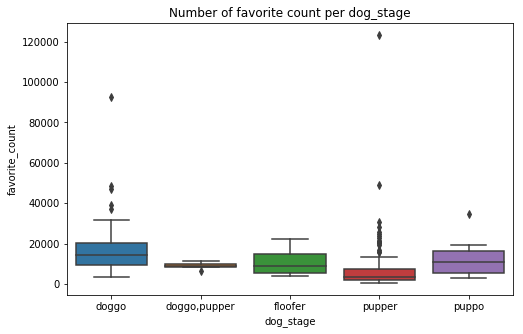

In [55]:
#visualize in a boxplot the number of favorite count per dog_stage
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
ax = snb.boxplot(x="dog_stage", y="favorite_count", data=twitter,width=.8).set_title('Number of favorite count per dog_stage')

In [56]:
twitter[twitter['dog_stage']=='doggo']['favorite_count'].describe()

count    35.000000   
mean     19428.142857
std      17051.038685
min      3460.000000 
25%      9428.000000 
50%      14138.000000
75%      20279.000000
max      92789.000000
Name: favorite_count, dtype: float64

In [57]:
twitter[twitter['dog_stage']=='pupper']['favorite_count'].describe()

count    118.000000   
mean     7569.000000  
std      13244.692973 
min      665.000000   
25%      2166.000000  
50%      3302.000000  
75%      7501.500000  
max      123120.000000
Name: favorite_count, dtype: float64

In [58]:
#See which ML guess has the more favorite_count and at which dog_stage is the dog breed
twitter[['p1','p1_dog','favorite_count', 'dog_stage']].sort_values(by='favorite_count',ascending=False).head(5)

p1  p1_dog  favorite_count dog_stage
125  French_bulldog    True    123120.0        pupper  
437  Chihuahua         True    121726.0        NaN     
217  English_springer  True    104993.0        NaN     
32   standard_poodle   True    92789.0         doggo   
237  golden_retriever  True    82619.0         NaN

In [59]:
#See which ML guess has the more retweet_count and at which dog_stage is the dog breed
twitter[['p1','p1_dog','retweet_count', 'dog_stage']].sort_values(by='retweet_count',ascending=False).head(10)

p1  p1_dog  retweet_count dog_stage
437   Chihuahua                 True    60266.0        NaN     
217   English_springer          True    43949.0        NaN     
32    standard_poodle           True    40508.0        doggo   
125   French_bulldog            True    35917.0        pupper  
1051  bubble                    False   33178.0        NaN     
397   cocker_spaniel            True    30044.0        NaN     
237   golden_retriever          True    26419.0        NaN     
33    prison                    False   20900.0        doggo   
1017  toy_poodle                True    20377.0        NaN     
223   Chesapeake_Bay_retriever  True    19022.0        NaN

In [60]:
#calculate the mean of rating_numerator for each year collected. 
twitter['year'] = pd.DatetimeIndex(twitter['timestamp']).year
twitter.groupby(['year'])['rating_numerator'].mean()

year
2015    9.353002 
2016    13.322900
2017    12.474545
Name: rating_numerator, dtype: float64